<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/xpW5D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [14]:
#open csv file
d1 = pd.read_csv('air traffic.csv')

In [15]:
d1.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [9]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp

In [ ]:
## TODO : load the dataset in a dataframe called d1,
# that you can find here : https://www.kaggle.com/code/youssefelzahar/inferential-statistics/input?select=air+traffic.csv

In [ ]:
## TODO: Check the summary of the DataFrame to see its structure and data types.

In [16]:
# Convert object columns with commas to numeric
cols_to_convert = d1.columns[2:14]  # Columns from Dom_Pax to ASM

for col in cols_to_convert:
    d1[col] = d1[col].str.replace(',', '').astype(int)

# Check the updated dtypes
print(d1.dtypes)

Year         int64
Month        int64
Dom_Pax      int64
Int_Pax      int64
Pax          int64
Dom_Flt      int64
Int_Flt      int64
Flt          int64
Dom_RPM      int64
Int_RPM      int64
RPM          int64
Dom_ASM      int64
Int_ASM      int64
ASM          int64
Dom_LF     float64
Int_LF     float64
LF         float64
dtype: object


In [17]:
d1.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,43032450,4905830,47938280,785160,57667,842827,36211422,12885980,49097402,56191300,17968572,74159872,64.44,71.71,66.20
1,2003,2,41166780,4245366,45412146,690351,51259,741610,34148439,10715468,44863907,50088434,15587880,65676314,68.18,68.74,68.31
2,2003,3,49992700,5008613,55001313,797194,58926,856120,41774564,12567068,54341633,57592901,17753174,75346075,72.53,70.79,72.12
3,2003,4,47033260,4345444,51378704,766260,55005,821265,39465980,10370592,49836572,54639679,15528761,70168440,72.23,66.78,71.02
4,2003,5,49152352,4610834,53763186,789397,55265,844662,41001934,11575026,52576960,55349897,15629821,70979718,74.08,74.06,74.07


In [ ]:
## TODO: Explore the relationship between domestic passengers and domestic flights.

In [19]:
correlation = d1['Dom_Pax'].corr(d1['Dom_Flt'])
print(f"Correlation between Domestic Passengers and Domestic Flights: {correlation:.3f}")

Correlation between Domestic Passengers and Domestic Flights: 0.537


As the number of domestic flights increases, the number of domestic passengers also tends to increase.

However, the relationship is not very strong or perfectly linear — other factors (e.g., average aircraft size, load factor, seasonality) likely also influence passenger volume.

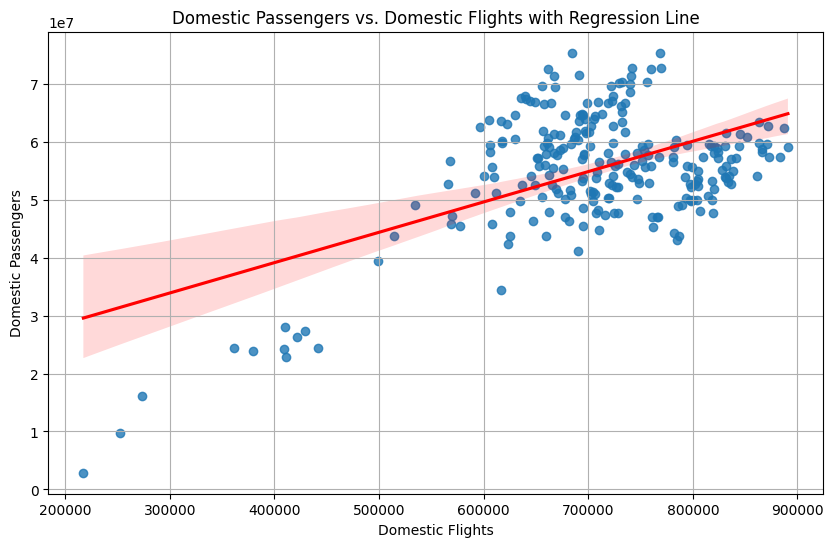

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Dom_Flt', y='Dom_Pax', data=d1, line_kws={'color': 'red'})
plt.title('Domestic Passengers vs. Domestic Flights with Regression Line')
plt.xlabel('Domestic Flights')
plt.ylabel('Domestic Passengers')
plt.grid(True)
plt.show()


In [ ]:
## TODO: Perform a linear regression between domestic passengers and domestic flights, and create a prediction model.

In [22]:
X = d1[['Dom_Flt']]  # Independent variable must be 2D
y = d1['Dom_Pax']    # Dependent variable

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r_squared:.3f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.4f}")

Mean Squared Error: 82041048700668.08
R-squared: -0.035
Intercept: 15686682.06
Coefficient: 55.6439


There’s no strong linear relationship between domestic flights and passengers in this dataset.

In [ ]:
## TODO: Plot the scatter plot of domestic passengers versus domestic flights, and overlay the linear regression line.

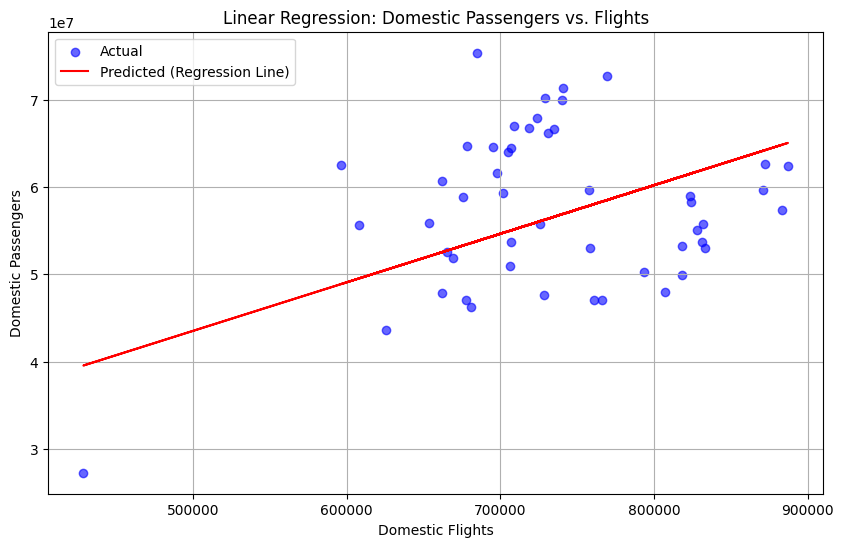

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted (Regression Line)')
plt.xlabel('Domestic Flights')
plt.ylabel('Domestic Passengers')
plt.title('Linear Regression: Domestic Passengers vs. Flights')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## TODO: Print the slope, intercept, p-value, standard error, and the predicted value for 100 domestic passengers.

In [28]:
# Run linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(d1['Dom_Pax'], d1['Dom_Flt'])

# Predict number of flights for 100 passengers
predicted_flights = slope * 100 + intercept

# Print results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")
print(f"Predicted Domestic Flights for 100 Passengers: {predicted_flights:.2f}")

Slope: 0.0055
Intercept: 402758.72
P-value: 0.0000
Standard Error: 0.0006
Predicted Domestic Flights for 100 Passengers: 402759.27


Slope: 0.0055

→ For each additional domestic passenger, the number of domestic flights increases by ~0.0055.
Or inversely, about 1 flight per 182 passengers.

Intercept: 402,758.72

→ Even if there were zero passengers, the model predicts ~402,759 domestic flights (clearly not realistic, suggesting extrapolation issues).

P-value: < 0.0001

→ The slope is statistically significant — the relationship between passengers and flights is not due to chance, even if it's weak.

Standard Error: 0.0006

→ Indicates the slope estimate is very precise (but that doesn't guarantee practical usefulness).

Prediction for 100 Passengers: 402,759.27 flights

→ Again, the prediction is dominated by the intercept, which limits interpretability for low values.

In [ ]:
## TODO: Calculate linear regression parameters


## TODO:  Define the function for the linear model


## TODO:  Apply the model to the 'Month' data


## TODO:  Plot the scatter plot and the regression line

# # Results
# print("slope =", slope)
# print("intercept =", intercept)
# print("r² =", r2)
# print("p =", p)
# print("std_err =", std_err)

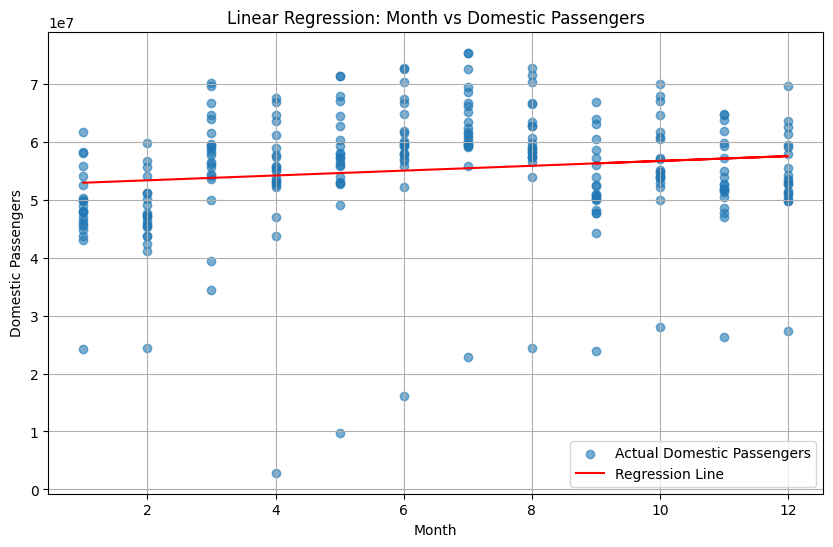

slope = 417178.98194524145
intercept = 52520664.66657786
r² = 0.018924410608185217
p = 0.029994683072702272
std_err = 191123.45911991072


In [30]:
# Calculate linear regression parameters
slope, intercept, r_value, p, std_err = stats.linregress(d1['Month'], d1['Dom_Pax'])

# r-squared
r2 = r_value**2

# Define the function for the linear model
def linear_model(x):
    return slope * x + intercept

# Apply the model to the 'Month' data
d1['Predicted_Dom_Pax'] = linear_model(d1['Month'])

# Plot scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(d1['Month'], d1['Dom_Pax'], label='Actual Domestic Passengers', alpha=0.6)
plt.plot(d1['Month'], d1['Predicted_Dom_Pax'], color='red', label='Regression Line')
plt.xlabel('Month')
plt.ylabel('Domestic Passengers')
plt.title('Linear Regression: Month vs Domestic Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Results
print("slope =", slope)
print("intercept =", intercept)
print("r² =", r2)
print("p =", p)
print("std_err =", std_err)


Slope = 417,179

→ On average, each additional month is associated with an increase of ~417,179 domestic passengers.

Intercept = 52,520,665

→ When Month = 0 (which doesn't exist in reality), the model predicts this baseline number of passengers — mostly a mathematical artifact.

R² = 0.019

→ The model explains only 1.9% of the variance in domestic passenger numbers — a very weak linear relationship.

P-value = 0.030

→ The result is statistically significant at the 5% level, but practically insignificant due to the low R².

Standard Error = 191,123

→ Shows moderate variability in the slope estimate.

In [ ]:
## TODO: Prepare the data X and è for regression by reshaping the features using .reshape(-1,1)

In [31]:
# Feature and target
X = d1['Month'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn
y = d1['Dom_Pax'].values  # Target remains 1D

In [ ]:
## TODO: Split the data into training and validation sets.
## TODO: Fit the linear regression model, make a prediction, and evaluate the model.
## TODO: Print the prediction for the given input.
## TODO: Calculate the mean squared error (MSE) for the training set.

In [32]:
# Split the data into training and validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make a prediction (e.g., for Month = 6)
pred_input = np.array([[6]])
prediction = model.predict(pred_input)

# Evaluate model on training set
train_preds = model.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)

# Output results
print(f"Prediction for Month 6: {int(prediction[0]):,}")
print(f"Training Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Model Coefficients: slope = {model.coef_[0]:.2f}, intercept = {model.intercept_:.2f}")

Prediction for Month 6: 54,386,200
Training Mean Squared Error (MSE): 111414812185851.67
Model Coefficients: slope = 486451.72, intercept = 51467489.86


Prediction for Month 6: 54,386,200 passengers

MSE (Training Set): ~1.11 × 10¹⁴ (indicates how much error your model makes on training data)

Slope (Month coefficient): 486,451.72

Intercept: 51,467,489.86

This suggests that each additional month corresponds to an increase of about 486,452 domestic passengers on average, though the relatively high MSE and earlier low R² suggest the relationship may not be very strong or linear.

In [ ]:
## TODO: Reshape the features mx and target variables my .
## TODO: Split the features and target variables into training and validation sets.
## TODO: Fit the multiple regression model and calculate the R^2 score on the training data using .score ## TODO: Print the target values
## TODO: Make a prediction using the multiple regression model.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare multiple features and the target
mx = d1[['Month', 'Year']].values  # Features: Month and Year
my = d1['Dom_Pax'].values          # Target: Domestic Passengers

# Split into training and validation sets
mx_train, mx_val, my_train, my_val = train_test_split(mx, my, test_size=0.2, random_state=42)

# Fit the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(mx_train, my_train)

# R² score on training data
r2_score_train = multi_model.score(mx_train, my_train)

# Print the target values
print("Target values (y_train):", my_train[:5])  # Just show first 5 for brevity

# Make a prediction — for example: Month=6, Year=2010
sample_input = np.array([[6, 2010]])
prediction = multi_model.predict(sample_input)

# Output results
print(f"Prediction for Month=6, Year=2010: {int(prediction[0]):,}")
print(f"R² score on training data: {r2_score_train:.4f}")
print(f"Coefficients: {multi_model.coef_}, Intercept: {multi_model.intercept_:.2f}")


Target values (y_train): [47957371 52473830 28026570 51165451 59758814]
Prediction for Month=6, Year=2010: 53,722,322
R² score on training data: 0.0399
Coefficients: [500434.58306388 218950.44993068], Intercept: -389370689.57


Target values (y_train): These are the actual domestic passenger values for your training data (first 5 values shown).

Prediction for Month=6, Year=2010: 53,722,322 passengers — based on the model.

R² score on training data: 0.0399 — this is quite low, indicating that the model doesn't explain much of the variance in domestic passengers.

Model coefficients:

Month coefficient (500,434.58): Each month corresponds to an increase of about 500,435 passengers.

Year coefficient (218,950.45): Each year corresponds to an increase of about 218,950 passengers.

Intercept (-389,370,689.57): This is the baseline prediction when both Month and Year are 0, but it’s mostly a mathematical result, not of practical significance.

Interpretation:

While the model is statistically significant, it still explains only about 4% of the variance in domestic passengers, and its predictive power could be improved with better features (seasonal trends, more data, etc.)

In [ ]:
## (Optional) TODO: Perform hypothesis testing for two variables of your choice
## TODO: Calculate the population mean of the "Year" column.
# let's take sample from data

# sample=np.random.choice(d1["Year"],50)
# # Perform a one-sample t-test to compare the sample mean with the population mean.
# ttest,p_value=ttest_1samp(sample,popmean) sample.mean()
# ## TODO: Perform hypothesis testing based on the p-value.

In [34]:
# Calculate the population mean of the 'Year' column
popmean = d1['Year'].mean()

# Take a sample from the 'Year' column (size = 50)
sample = np.random.choice(d1['Year'], 50)

# Perform a one-sample t-test to compare the sample mean with the population mean
ttest, p_value = ttest_1samp(sample, popmean)

# Print results
print(f"Sample Mean: {sample.mean():.2f}")
print(f"Population Mean: {popmean:.2f}")
print(f"T-statistic: {ttest:.2f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: the sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference between the sample mean and the population mean.")

Sample Mean: 2013.08
Population Mean: 2012.88
T-statistic: 0.24
P-value: 0.8082
Fail to reject the null hypothesis: there is no significant difference between the sample mean and the population mean.


Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This suggests that there is no significant difference between the sample mean and the population mean for the Year column.

The sample is representative of the population in terms of the "Year" variable.

There's no evidence that your sample is biased or significantly different from the full dataset when it comes to years.

In [ ]:
## TODO: Randomly select a sample of 50 from the "Dom_Pax" column.
## TODO: Perform an independent t-test between sample_a and sample_b to compare their means. if p_value <=0.05:
#     print("rejected null hypothesis",p_value)
# else:
#     print("accepted null hypothesis",p_value)

In [36]:
from scipy.stats import ttest_ind

# Randomly select two independent samples from 'Dom_Pax'
sample_a = np.random.choice(d1["Dom_Pax"], 50, replace=False)
sample_b = np.random.choice(d1["Dom_Pax"], 50, replace=False)

# Perform an independent t-test
t_stat, p_value = ttest_ind(sample_a, sample_b)

# Output the result
if p_value <= 0.05:
    print("Rejected null hypothesis", p_value)
else:
    print("Accepted null hypothesis", p_value)


Accepted null hypothesis 0.7537021116576083


That result — p-value = 0.75 — indicates that there is no statistically significant difference between the means of the two randomly selected samples from the "Dom_Pax" (Domestic Passengers) column.

In simple terms:
The two samples could have come from the same population. Any difference in their means is likely due to random chance rather than a real effect.

This supports the null hypothesis, which assumes there is no difference between the two group means.